In [1]:
'''Importacion de las librerias que seran módulos necesarios para el desarrollo el algoritmo de arboles de decisión en el desarrollo del laboratorio '''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
'''Cargar y leer el conjunto de datos de diabetes mediate la librería pandas'''
datos = pd.read_csv("Dataset of Diabetes.csv")
datos

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [3]:
'''Seleccionamos las colunma CLASS que contiene texto y sera transformada de forma numerica'''  
datos.groupby("CLASS").size()

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64

In [4]:
'''Seleccionamos las colunma GENDER que contienen texto y sera transformada de forma numerica'''
datos.groupby("Gender").size()

Gender
F    434
M    565
f      1
dtype: int64

In [5]:
'''Seleccionamos las colunma GENDER y CLASS  para hacer la limpieza de datos'''
dataGender = {'M': 'M', 'F': 'F', 'f': 'F'}
datos['Gender'] = datos['Gender'].map(dataGender)
dataClass = {'N ':'N','N': 'N', 'Y':'Y', 'Y ': 'Y', 'P': 'P'}
datos['CLASS'] = datos['CLASS'].map(dataClass)
datos

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [6]:
 '''Seleccionamos las colunma CLASS que contiene texto y sera transformada de forma numerica'''
datos.groupby("CLASS").size()

CLASS
N    103
P     53
Y    844
dtype: int64

In [7]:
 '''Seleccionamos las colunma GENDER que contiene texto y sera transformada de forma numerica'''
datos.groupby("Gender").size()

Gender
F    435
M    565
dtype: int64

In [8]:
'''Seleccionamos las colunma GENDER que contiene texto y sera transformada de forma numerica como se visualiza M tendra
        el valor de 0 y la ltera F tendra el valor de 1 y de igual manera la columna Class tendra el valor de N igual 0 , Y igual a 1
        y la P igual 2'''

dataGender = {'M': 0, 'F': 1}
datos['Gender'] = datos['Gender'].map(dataGender)
dataClass = {'N': 0,'Y': 1, 'P': 2}
datos['CLASS'] = datos['CLASS'].map(dataClass).fillna(0.0).astype(int)
datos

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [9]:
 '''Visualizamos la informacion de nuestro dataset'''
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int32  
dtypes: float64(8), int32(1), int64(5)
memory usage: 105.6 KB


In [10]:
'''Visualizamos nuestro dataset sin ningun archivo de texto solo numerico '''
datos

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [11]:
 '''Visualizacion del nombre de las características (X) y nuestra target que sera nuestra etiqueta
    para la verificación de datos, de igual manera la declaracion de nuestra y, X'''

feature_cols = [ 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL','VLDL', 'BMI' ]
X = datos[feature_cols] # features
y = datos['CLASS'] # target

In [12]:
'''Crecion de la funcion para entrenar el modelo tomando el 70 porciento de datos del dataset y el 30 para las pruebas del azar'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
''' Como primer paso se crea el àrbol de decisiòn y se entrena el modelo para que revele la predicciòn de los datos de prueba'''
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
'''imprimos nuestra y_predy'''
print(y_pred)

[1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 2 1 1 2 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 0 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 0 1 1]


In [14]:
 ''' Se procede a evaluar el modelo entrenado mediante las metricas evaluando el Accuray'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9633333333333334


In [15]:
'''Importamos las librerias que nos ayudarán para la visualizacion del arbol de decision '''
    
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

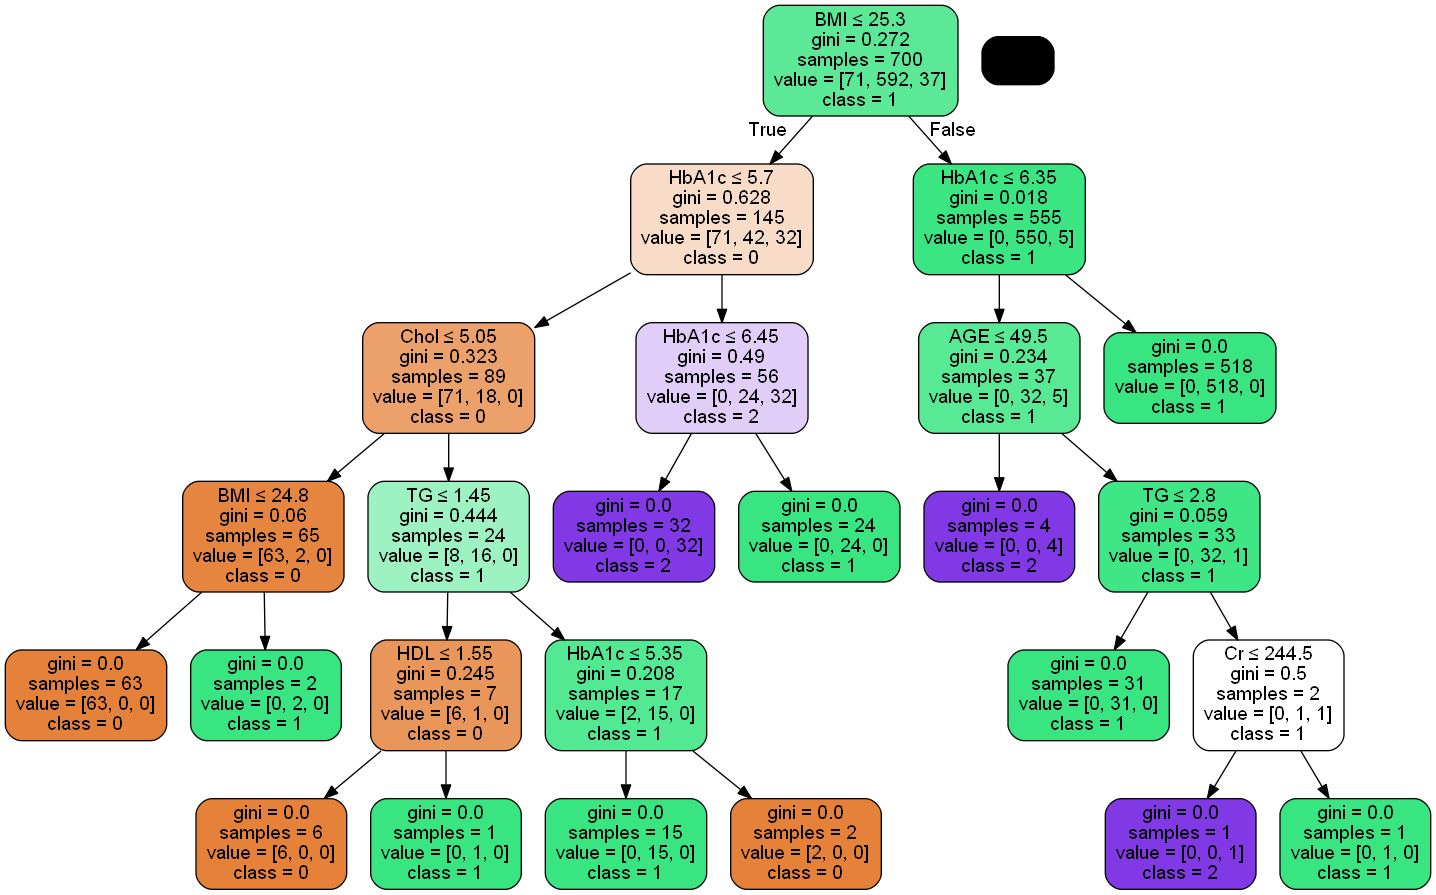

In [16]:
'''Finalmente creamos la funciòn para mostrar la imagen de nuestro àrbol'''
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arboldiabetes.png')
Image(graph.create_png())

In [17]:
 '''Creamos el objeto  clasificador, lo entrenamos, predecimos la respuesta y finalmente hacemos la precision del modelo'''

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


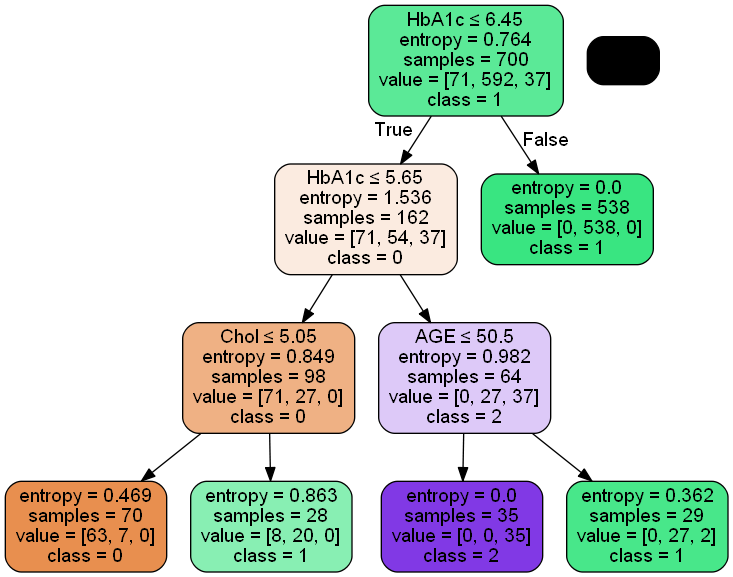

In [18]:
'''Creamos una funcion que se encarga de cotar el arbol '''


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

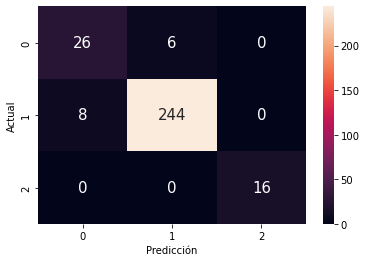

In [21]:
'''Ingresamos las nuevas librerias a utilizar para la implementacion de la matriz de confusión, de igual forma con la libreria
seaborn definimos nuestras variables '''
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicción']), annot=True,  annot_kws={'size': 15}, fmt = "d")
plt.show()

In [22]:
'''Prcedemos a realizar las diferentes metricas apartir de la matriz de la matriz de confusión, mismo que tendremos como resultado
la prediccion, recall y f1-score '''
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.98      0.97      0.97       252
           2       1.00      1.00      1.00        16

    accuracy                           0.95       300
   macro avg       0.91      0.93      0.92       300
weighted avg       0.95      0.95      0.95       300

